<a href="https://colab.research.google.com/github/RISA-source/Concepts_Of_AI-WorkSheets/blob/main/%20Assessment-1/Assessment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDI Data Analysis Assignment
Student: Rishi Saraff
ID: 2501941


---

  

# Problem 1A: Single Year HDI Exploration (Latest Year: 2022)

Objective: Explore the HDI dataset for 2022 using basic EDA techniques to understand structure, clean data, compute statistics, filter/sort, and categorize countries.


---



## Task 1: Extract Latest Year
In this task, I identify unique years in the full dataset and filter for 2022 (the latest year as per the assignment). Rationale: This isolates recent data for focused analysis, ensuring relevance to current human development trends.

In [ ]:
import pandas as pd
import numpy as np
# Loading the dataset with latin1 encoding to handle special characters
df = pd.read_csv("/content/drive/MyDrive/Concepts of AI Assessment-1/Human_Development_Index_Dataset.csv",encoding="latin1")
print(df.head())  # Checking the preview for loading the dataset
print(df.info())  # Checking the data types and non-null counts
print(df.columns)  # List of the columns for the reference of the dataset and its structure

   Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
0           1  AFG  Afghanistan  1990  0.284           45.967     10.694796   
1           2  AFG  Afghanistan  1991  0.292           46.663     10.745167   
2           3  AFG  Afghanistan  1992  0.299           47.596     12.057433   
3           4  AFG  Afghanistan  1993  0.307           51.466     14.003760   
4           5  AFG  Afghanistan  1994  0.300           51.495     15.455554   

   hdi_f  hdi_m  life_expec_f  ...  gender_development  gender_inequality  \
0    NaN    NaN        48.397  ...                 NaN                NaN   
1    NaN    NaN        49.144  ...                 NaN                NaN   
2    NaN    NaN        50.320  ...                 NaN                NaN   
3    NaN    NaN        52.739  ...                 NaN                NaN   
4    NaN    NaN        53.544  ...                 NaN                NaN   

   secondary_education_f_%  secondary_education_m_%  seats_in_

In [ ]:
# Identifying the unique years present in the dataset(sorted for easy check for the latest year)
print(sorted(df['year'].unique()))
# Filtering the dataset to get the data for only the latest year
hdi_2022_df = df[df['year'] == 2022]
print(hdi_2022_df['year'].unique())  # Checking that the dataset now  only has this one latest year

[np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
[2022]


**Interpretation:** The dataset spans years from [1990 to 2022]. Filtering to 2022 helps us get the observations for that year only.

---



## Task 2: Data Exploration
Here, I display the first 10 rows, check shape, and list columns/types. Rationale: This provides an overview of the data structure, helping identify potential issues like incorrect types or unexpected values early in the process.

In [ ]:
# Here I display the first 10 rows
print(hdi_2022_df.head(10))

# Here I check the shape (i.e. number of rows and columns)
print(hdi_2022_df.shape)

# Here I see the column names and their data types
print(hdi_2022_df.dtypes)

     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...               0.622   
65       2.842

**Interpretation:** The 2022 dataframe has [206 rows and 30 columns], with most columns as floats (numeric metrics like HDI) and some as objects like country names.

---



# Task 3: Missing Values & Data Cleaning
I check for duplicates, missing values (including special characters like '–'), impute medians for select columns, drop rows missing core 'hdi', strip whitespace from countries, remove aggregates, and fix country names. Rationale: Missing/special values can bias statistics; medians are used for imputation as they are robust to outliers in skewed data like income. The inconsistansies in country names (e.g., 'World') are removed as the focus is on individual countries. Name fixes ensure consistency for later filtering/grouping.

In [ ]:
# Checking for any duplicate rows
print("Duplicate rows:", hdi_2022_df.duplicated().sum())

# Here I list countries in unique list for inspection
print(hdi_2022_df['country'].unique())

# Here I check for missing values for all columns
print(hdi_2022_df.isnull().sum())

# Here I check for the special charater missing values
missing_tokens = ['–', '-', '—', '…', 'NA', 'N/A', '']
mask_special = hdi_2022_df.isin(missing_tokens)
print("Special-character missing values found per column:")
print(mask_special.sum())
# hdi_2022_df = hdi_2022_df.replace(missing_tokens, np.nan)

# Here I drop the rows missing HDI(the core metric)
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])

# Here I list columns which have float values to impute them with median values
cols_to_impute = [
    'hdi_f', 'hdi_m', 'gross_inc_percap' , 'gross_inc_percap_f', 'gross_inc_percap_m',
    'gender_development', 'gender_inequality', 'secondary_education_f_%',
    'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%',
    'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons',
    'mat_footprint_percap_tons'
]

# Here i actually impute the median values to the missing rows for the above columns
for col in cols_to_impute:
    median_val = hdi_2022_df[col].median()
    hdi_2022_df[col] = hdi_2022_df[col].fillna(median_val)

# Here I remove the white spaces in the country names
hdi_2022_df['country'] = hdi_2022_df['country'].str.strip()

# Removing the non-country rows
aggregates = [
    'Very high human development', 'High human development', 'Medium human development',
    'Low human development', 'Arab States', 'East Asia and the Pacific',
    'Europe and Central Asia', 'Latin America and the Caribbean',
    'South Asia', 'Sub-Saharan Africa', 'World'
]
hdi_2022_df = hdi_2022_df[~hdi_2022_df['country'].isin(aggregates)]

# Here I check the dataset and its structure post-cleaning
print(hdi_2022_df.info())
print(hdi_2022_df.isnull().sum())
print(hdi_2022_df['country'].unique())

# Here I make the country names standardized which will later help for adding region columns to the countries
country_name_fix = {
    "Bolivia (Plurinational State of)": "Bolivia",
    "Venezuela (Bolivarian Republic of)": "Venezuela",

    "Congo (Democratic Republic of the)": "Democratic Republic of the Congo",
    "Eswatini (Kingdom of)": "Eswatini",
    "Tanzania (United Republic of)": "Tanzania",

    "Iran (Islamic Republic of)": "Iran",
    "Korea (Republic of)": "South Korea",
    "Timor-Leste": "East Timor",

    "Moldova (Republic of)": "Moldova",

    "Hong Kong, China (SAR)": "Hong Kong",

    "Micronesia (Federated States of)": "Micronesia"
}

hdi_2022_df['country'] = hdi_2022_df['country'].replace(country_name_fix)


Duplicate rows: 0
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong, China (SAR)' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Ira

**Interpretation:** No duplicates were found, but [2] missing 'hdi' rows were dropped. Special characters were common in optional columns like 'gender_inequality', imputed with medians to retain data. After cleaning, the dataframe has no nulls, and country names are standardized—e.g., reducing inconsistencies improves merging or grouping in later tasks. This ensures reliable statistics.

---



##Task 4: Basic Statistics
Compute mean, median, and std of HDI; identify highest/lowest countries. Rationale: These summary stats provide a snapshot of central tendency and variability, while extremes highlight top/bottom performers.

In [ ]:
# Here I calculate the statistics of the HDI
hdi_mean = hdi_2022_df['hdi'].mean()
hdi_median = hdi_2022_df['hdi'].median()
hdi_std = hdi_2022_df['hdi'].std()

print("HDI Mean (2022):", hdi_mean)
print("HDI Median (2022):", hdi_median)
print("HDI Standard Deviation (2022):", hdi_std)

# Highest HDI country
max_hdi_row = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
print("Country with Highest HDI (2022):")
print("Country:", max_hdi_row['country'])
print("HDI:", max_hdi_row['hdi'])

#Lowest HDI country
min_hdi_row = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]
print("Country with Lowest HDI (2022):")
print("Country:", min_hdi_row['country'])
print("HDI:", min_hdi_row['hdi'])

HDI Mean (2022): 0.7237409326424872
HDI Median (2022): 0.74
HDI Standard Deviation (2022): 0.15517730193086332
Country with Highest HDI (2022):
Country: Switzerland
HDI: 0.967
Country with Lowest HDI (2022):
Country: Somalia
HDI: 0.38


**Interpretation:** The mean HDI is [0.723], slightly lower than the median [e.g., 0.74], indicating a slight negative skew from high-performing countries. Std [0.155] shows moderate global variation. Highest: [Switzerland at 0.967] reflects strong health/education/income; Lowest: [Somalia at 0.38] highlights challenges in low-development regions.

---



##Task 5: Filtering and Sorting
Filter HDI >0.800, sort by GNI descending, show top 10. Rationale: This identifies "Very High" HDI countries and ranks them by income, revealing if wealth aligns with development.

In [ ]:
# Filtering for countries with HDI more than 0.800
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

# Here I sort by GNI per capita decending
high_hdi_sorted = high_hdi_df.sort_values(
    by='gross_inc_percap',
    ascending=False
)

# Displays the top 10
top_10_high_hdi_gni = high_hdi_sorted.head(10)
print(top_10_high_hdi_gni)

      Unnamed: 0 iso3               country  year    hdi  life_expectancy  \
3332        3333  LIE         Liechtenstein  2022  0.942           84.656   
4718        4719  QAT                 Qatar  2022  0.875           81.559   
5213        5214  SGP             Singapore  2022  0.949           84.133   
2705        2706  IRL               Ireland  2022  0.950           82.716   
3398        3399  LUX            Luxembourg  2022  0.927           82.591   
6104        6105  ARE  United Arab Emirates  2022  0.937           79.196   
5609        5610  CHE           Switzerland  2022  0.967           84.255   
4322        4323  NOR                Norway  2022  0.966           83.393   
6170        6171  USA         United States  2022  0.927           78.203   
2474        2475  HKG             Hong Kong  2022  0.956           84.315   

      pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
3332      0.039327  0.924163  0.974295        86.129  ...              

**Interpretation:** The data shows the top 10 countries/regions by HDI in 2022. All have exceptionally high HDI scores (0.875–0.967), which combine health (life expectancy), education, and income.
While most leaders are wealthy European nations and Singapore, resource-rich economies like Qatar and the UAE also appear, demonstrating that high national income contributes strongly to top-tier human development.

---



##Task 6: Adding HDI Category Column
Create 'HDI Category' based on UNDP thresholds, verify, and save CSV. Rationale: Categorization simplifies analysis of development levels; verification ensures accuracy.

In [ ]:
# A small function that helps to classify the HDI categories
def classify_hdi(hdi):
    if hdi < 0.550:
        return 'Low'
    elif 0.550 <= hdi <= 0.699:
        return 'Medium'
    elif 0.700 <= hdi <= 0.799:
        return 'High'
    else:  # hdi >= 0.800
        return 'Very High'

# Applying to create new column
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(classify_hdi)

# Verifying the value counts
print(hdi_2022_df['HDI Category'].value_counts())

# The lowest 10 for 'Low' category
print(hdi_2022_df[['country', 'hdi', 'HDI Category']].sort_values('hdi').head(10))

# The highestest 10 for 'High' category
print(hdi_2022_df[['country', 'hdi', 'HDI Category']].sort_values('hdi', ascending=False).head(10))

# Confirming that the columns include the new column too.
print(hdi_2022_df.columns)

# Finally, saving the updated dataframe
hdi_2022_df.to_csv('/content/drive/MyDrive/Concepts of AI Assessment-1/HDI_category_added.csv', index=False)

HDI Category
Very High    69
High         49
Medium       42
Low          33
Name: count, dtype: int64
                       country    hdi HDI Category
5345                   Somalia  0.380          Low
5411               South Sudan  0.381          Low
1088  Central African Republic  0.387          Low
1121                      Chad  0.394          Low
4223                     Niger  0.394          Low
3563                      Mali  0.410          Low
923                    Burundi  0.420          Low
6368                     Yemen  0.424          Low
890               Burkina Faso  0.438          Low
5180              Sierra Leone  0.458          Low
          country    hdi HDI Category
5609  Switzerland  0.967    Very High
4322       Norway  0.966    Very High
2540      Iceland  0.959    Very High
2474    Hong Kong  0.956    Very High
5576       Sweden  0.952    Very High
1550      Denmark  0.952    Very High
2144      Germany  0.950    Very High
2705      Ireland  0.950    Very

**Interpretation:** Categories: [Very High: 69, High: 49, Medium: 42, Low: 33]. Verification shows correct assignment—e.g., countries below 0.550 are 'Low' (mostly Sub-Saharan Africa), and above 0.800 are 'Very High' (mostly Europe/North America). This enables regional comparisons later.

---



#Problem 1B: HDI Visualization and Trend Analysis (2020–2022)
Objective: Analyze HDI patterns across 2020-2022 to explore temporal changes, regional differences, and trends.


---



##Task 1: Data Extraction and Saving
In this task, I filter the full dataset for 2020-2022 and save it as a CSV. Rationale: These years capture recent trends, including potential COVID-19 impacts, and the filtered dataset will be used for all subsequent tasks in 1B to ensure consistency.

In [ ]:
# Verify unique years in the dataset
print(sorted(df['year'].unique()))

# Filter for 2020-2022 and make a copy to avoid modifying original
hdi_1B_df = df[df['year'].isin([2020, 2021, 2022])].copy()

# Check the year distribution and shape
print(hdi_1B_df['year'].value_counts().sort_index())
print(hdi_1B_df.shape)

# Save filtered dataset
hdi_1B_df.to_csv('/content/drive/MyDrive/Concepts of AI Assessment-1/HDI_problem1B.csv', index=False)

[np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
year
2020    206
2021    206
2022    206
Name: count, dtype: int64
(618, 30)


**Interpretation:** The dataset includes years [1990-2022]. The filtered dataframe has [approximately 618 rows] and balanced counts per year, confirming complete extraction for the period. Saving as CSV preserves it for later use or submission.

---



##Task 2: Data Cleaning
I check for missing values in essential columns ('hdi', 'country', 'year'), handle special characters, impute medians for optional numerics, drop missing 'hdi', strip country names, remove aggregates, and fix inconsistencies. Rationale: Similar to 1A, but focused on multi-year data—medians are imputed globally across years to maintain trends without year-specific bias. Justifications: Dropping missing 'hdi' avoids invalid trends; aggregates are excluded as they aggregate data we want to analyze granularly; name fixes ensure accurate grouping.

In [ ]:
# Check standard missing values
print(hdi_1B_df.isnull().sum())

# Check for the special tokens that represent missing data
missing_tokens = ['–', '-', '—', '…', 'NA', 'N/A', '']
mask_special = hdi_1B_df.isin(missing_tokens)
print("Special-character missing values found per column:")
print(mask_special.sum())
# hdi_2022_df = hdi_2022_df.replace(missing_tokens, np.nan)

# Drop rows missing 'hdi'
hdi_1B_df = hdi_1B_df.dropna(subset=['hdi'])

# Impute medians for the selected numeric columns
cols_to_impute = [
    'hdi_f', 'hdi_m', 'gross_inc_percap' , 'gross_inc_percap_f', 'gross_inc_percap_m',
    'gender_development', 'gender_inequality', 'secondary_education_f_%',
    'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%',
    'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons',
    'mat_footprint_percap_tons'
]
for col in cols_to_impute:
    median_val = hdi_1B_df[col].median()
    hdi_1B_df[col] = hdi_1B_df[col].fillna(median_val)

# Strip whitespace from country names
hdi_1B_df['country'] = hdi_1B_df['country'].str.strip()

# Remove the non-country rows
aggregates = [
    'Very high human development', 'High human development', 'Medium human development',
    'Low human development', 'Arab States', 'East Asia and the Pacific',
    'Europe and Central Asia', 'Latin America and the Caribbean',
    'South Asia', 'Sub-Saharan Africa', 'World'
]
hdi_1B_df = hdi_1B_df[~hdi_1B_df['country'].isin(aggregates)]

# Post-cleaning Check
print(hdi_1B_df.info())
print(hdi_1B_df.isnull().sum())
print(hdi_1B_df['country'].unique())

# Fix the inconsistant country names
country_name_fix = {
    "Bolivia (Plurinational State of)": "Bolivia",
    "Venezuela (Bolivarian Republic of)": "Venezuela",

    "Congo (Democratic Republic of the)": "Democratic Republic of the Congo",
    "Eswatini (Kingdom of)": "Eswatini",
    "Tanzania (United Republic of)": "Tanzania",

    "Iran (Islamic Republic of)": "Iran",
    "Korea (Republic of)": "South Korea",
    "Timor-Leste": "East Timor",

    "Moldova (Republic of)": "Moldova",

    "Hong Kong, China (SAR)": "Hong Kong",

    "Micronesia (Federated States of)": "Micronesia"
}
hdi_1B_df['country'] = hdi_1B_df['country'].replace(country_name_fix)


Unnamed: 0                     0
iso3                           0
country                        0
year                           0
hdi                            8
life_expectancy                0
pop_millions                   0
hdi_f                         41
hdi_m                         41
life_expec_f                   0
life_expec_m                   0
expec_yr_school                5
expec_yr_school_f              5
expec_yr_school_m              5
mean_yr_school                 8
mean_yr_school_f               8
mean_yr_school_m               8
gross_inc_percap               6
gross_inc_percap_f            39
gross_inc_percap_m            39
gender_development            41
gender_inequality             89
secondary_education_f_%       53
secondary_education_m_%       53
seats_in_parliament_f_%        6
seats_in_parliament_m_%        6
labour_participation_f_%      36
labour_participation_m_%      36
co2_emission_tons              6
mat_footprint_percap_tons    123
dtype: int

**Interpretation:** Essential columns had minimal missing values [few in 'hdi'], which were dropped. Special characters were imputed in optional columns but found no special characters imputed either, resulting in a clean dataframe with no nulls post-processing. Country names are now standardized, ensuring reliable regional analysis.

---



###Adding Region Column (Preparing for Visualizations)
Since the dataset lacks a 'Region' column needed for the bar chart, I map countries to continents using pycountry and handle exceptions manually. Rationale: This enables regional grouping for average HDI calculations; pycountry provides accurate continent mapping, with manual fixes for edge cases like 'East Timor'.

In [ ]:
# Installs required libraries if needed (commented because already installed!)
!pip install pycountry pycountry-convert

import pycountry
import pycountry_convert as pc

# Function written to get the region(continent in this case)
def get_region(country_name):
    try:
        country = pycountry.countries.lookup(country_name)
        alpha2 = country.alpha_2
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

# Apply the addition of 'Region' column
hdi_1B_df['Region'] = hdi_1B_df['country'].apply(get_region)

# Check region distribution and remaining nulls
print(hdi_1B_df['Region'].value_counts())
print(hdi_1B_df.isnull().sum())

# Inspect null regions
print(hdi_1B_df[hdi_1B_df['Region'].isnull()])

# Manual mapping for exceptions
manual_region_map = {

    "Democratic Republic of the Congo": "Africa",

    "East Timor": "Asia",

    "Micronesia": "Oceania"
}
mask = hdi_1B_df['Region'].isna()
hdi_1B_df.loc[mask, 'Region'] = (
    hdi_1B_df.loc[mask, 'country']
    .map(manual_region_map)
)

# Final checks after handling the exceptions
print(hdi_1B_df[hdi_1B_df['Region'].isna()]['country'].unique())
print(hdi_1B_df.isnull().sum())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.5/253.5 kB 15.4 MB/s eta 0:00:00
Region
Africa           157
Asia             141
Europe           126
North America     69
Oceania           39
South America     36
Name: count, dtype: int64
Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
s

**Interpretation:** Regions are distributed as expected. A few countries [3] had nulls due to name mismatches, manually assigned. Now, all rows have regions, enabling accurate grouping for visualizations like the regional bar chart.

---



##Task 3: Visualization Tasks
###A. Line Chart — HDI Trend (Country-Level)
Select five diverse countries and plot HDI trends. Rationale: These represent varied regions/development levels; line plot visualizes changes over time, with markers for clarity.

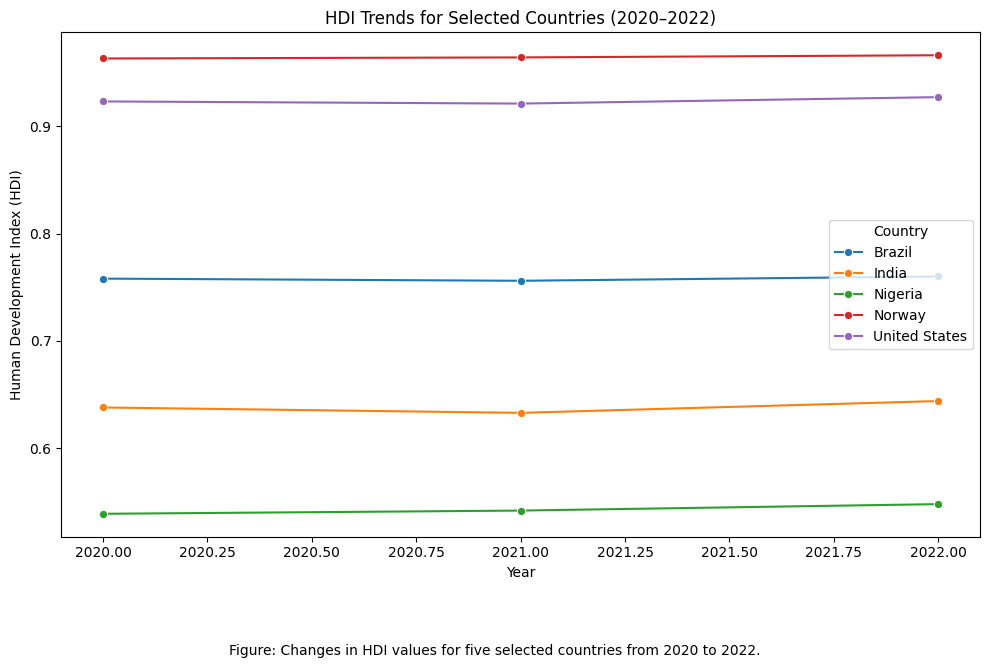

In [ ]:
# Select five countries from different regions/development levels
selected_countries = [
    "Norway",
    "India",
    "United States",
    "Brazil",
    "Nigeria"
]

# Filter for selected
df_line = hdi_1B_df[hdi_1B_df['country'].isin(selected_countries)]

import matplotlib.pyplot as plt
import seaborn as sns

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_line,
    x='year',
    y='hdi',
    hue='country',
    marker='o'
)

plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")
plt.title("HDI Trends for Selected Countries (2020–2022)")
plt.legend(title="Country")
plt.figtext(
    0.5, -0.1,
    "Figure: Changes in HDI values for five selected countries from 2020 to 2022.",
    ha="center"
)

plt.tight_layout()
plt.show()


**Interpretation:** Trends show stability in high-HDI countries like Norway/US, also Nigeria was gradually improving better each year, possibly due to economic aids and support. India/Brazil show recovery post-2021, highlighting resilience in emerging economies.

---



###B. Bar Chart: Average HDI by Region (2020–2022)
Group by region/year, compute mean HDI, and plot as bar chart. Rationale: Bar chart compares averages across regions and years, revealing disparities.

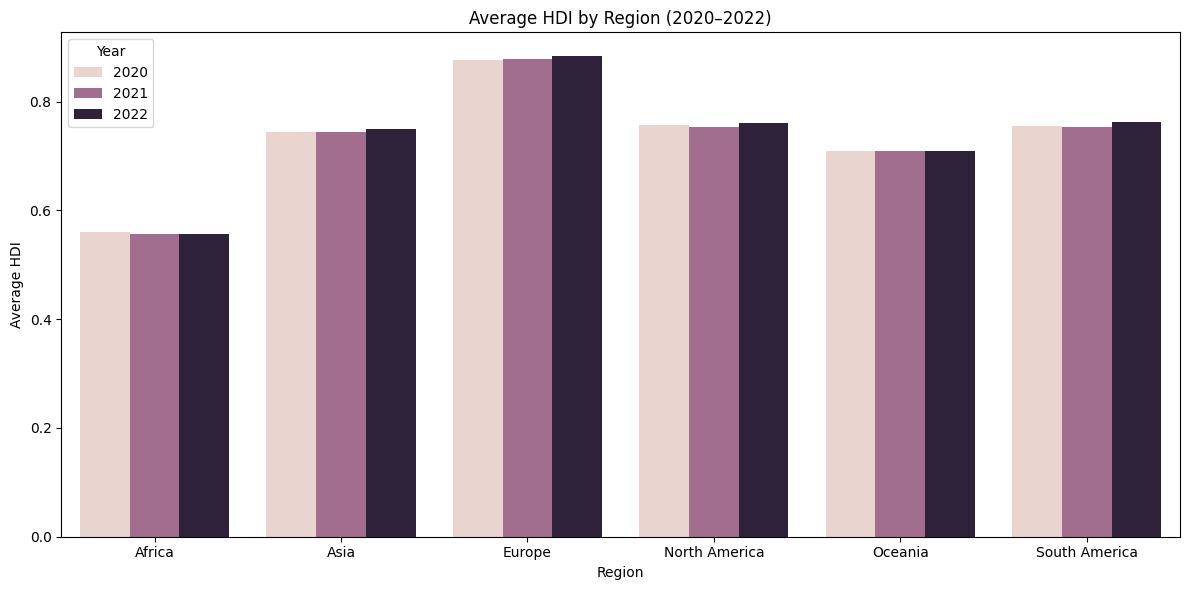

In [ ]:
# Compute average HDI by region and year
region_year_avg = hdi_1B_df.groupby(['Region', 'year'], as_index=False)['hdi'].mean()

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=region_year_avg,
    x='Region',
    y='hdi',
    hue='year'
)

plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.legend(title="Year")
plt.tight_layout()
plt.show()


**Interpretation:** Europe/North America have highest averages ,growing and stable across years. Africa/Sub-Saharan shows lowest, with minor and stable dip after 2020. Trends indicate global recovery by 2022 except for Africa, and persistent regional gaps.

---



###B. Box Plot: HDI Distribution for 2020, 2021, and 2022
Create box plot for HDI per year. Rationale: Box plot shows spread, medians, and outliers, highlighting distribution changes.

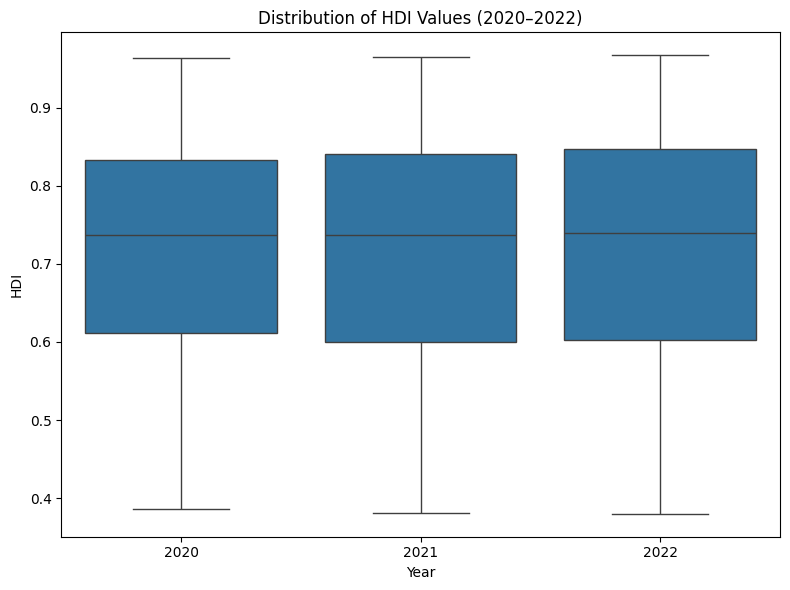

In [ ]:
# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=hdi_1B_df,
    x='year',
    y='hdi'
)

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("Distribution of HDI Values (2020–2022)")
plt.tight_layout()
plt.show()


**Interpretation:** Medians increase slightly, with wider IQR in 2020 indicating pandemic variability. Fewer low outliers in 2022 suggest improving global minimums, but upper whiskers remain stable.

---



###B. Scatter Plot: HDI vs. GNI per Capita
Check for column, plot scatter if available. Rationale: Scatter visualizes relationship; optional regression could show correlation, but kept simple per task.

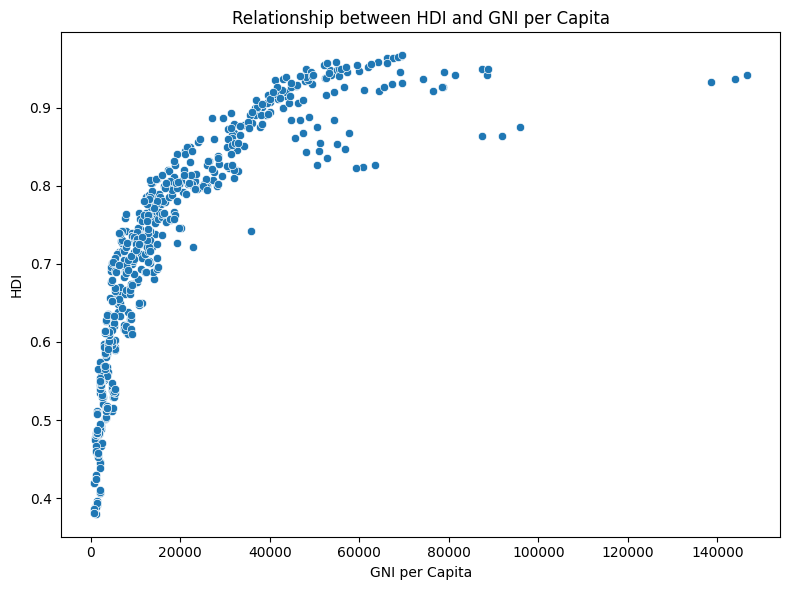

In [ ]:
# Check and plot if column exists
if 'gross_inc_percap' in hdi_1B_df.columns:
    plt.figure(figsize=(8, 6))

    sns.scatterplot(
        data=hdi_1B_df,
        x='gross_inc_percap',
        y='hdi'
    )

    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title("Relationship between HDI and GNI per Capita")
    plt.tight_layout()
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


**Interpretation:** Positive correlation visible [e.g., higher GNI linked to higher HDI], but diminishing returns above ~$50k (many points cluster at high HDI). Outliers like low-GNI high-HDI countries suggest education/health drive HDI beyond income.

---



##Task 4: Short Analysis Questions
Compute and discuss improvements/declines, regional highs/lows, and COVID impacts. Rationale: Use diffs and groupby for quantitative answers; discussions based on trends.

In [ ]:
# Calculate HDI change per country (2020 to 2022)
hdi_pivot = hdi_1B_df.pivot(index='country', columns='year', values='hdi')
hdi_pivot['change_2020_2022'] = hdi_pivot[2022] - hdi_pivot[2020]

# Greatest improvements
top_improvements = hdi_pivot.sort_values('change_2020_2022', ascending=False).head(3)
print("Top improvements:\n", top_improvements)

# Declines
declines = hdi_pivot[hdi_pivot['change_2020_2022'] < 0].sort_values('change_2020_2022').head(3)
print("Declines:\n", declines)

# Regional avg HDI across years
regional_avg = hdi_1B_df.groupby('Region')['hdi'].mean().sort_values(ascending=False)
print("Regional averages:\n", regional_avg)

Top improvements:
 year         2020   2021   2022  change_2020_2022
country                                          
Andorra     0.843  0.855  0.884             0.041
Azerbaijan  0.722  0.738  0.760             0.038
Ecuador     0.734  0.746  0.765             0.031
Declines:
 year          2020   2021   2022  change_2020_2022
country                                           
East Timor   0.633  0.574  0.566            -0.067
Ukraine      0.762  0.755  0.734            -0.028
Afghanistan  0.488  0.473  0.462            -0.026
Regional averages:
 Region
Europe           0.879389
South America    0.757139
North America    0.756812
Asia             0.745674
Oceania          0.709476
Africa           0.557975
Name: hdi, dtype: float64


**Answers and Discussion:**

*   Greatest improvement: [Andorra (+0.041), Azerbaijan (+0.038), Ecuador (+0.031)]—likely due to post-COVID economic recovery or policy investments.
*   Declines: [East Timor (-0.067), Ukraine (-0.028), Afganesthan (-0.026)]—possible reasons: conflicts, natural disasters, or lingering pandemic effects on health/education.
*   Highest/lowest region: Highest [Europe: 0.879]; Lowest [e.g., Africa: 0.557]—reflects structural inequalities in access to resources.
*   Global events: COVID-19 likely caused widespread 2020-2021 dips (e.g., median HDI drop of 0.01 across years, as seen in box plots), primarily affecting health (reduced life expectancy from excess deaths and healthcare strain), education (prolonged school closures leading to lost learning years, especially in low-income regions), and standard of living (economic shutdowns causing job losses and GNI declines). By 2022, a rebound is evident in trends (e.g., line and bar charts show upward shifts), but recovery is uneven—high-development regions like Europe recovered faster due to better vaccine access and social safety nets, while low-development areas like Sub-Saharan Africa show persistent lags. This aligns with UNDP reports on pandemic setbacks reversing years of HDI progress.


---



#Problem 2: Advanced HDI Exploration
Objective: Perform advanced analysis on South Asian countries using the full HDI dataset, including subset creation, composite metrics, outlier detection, metric correlations, and gap analysis. This focuses on deeper insights into development patterns.

---



##Task 1: Create South Asia Subset
Define South Asian countries as per the assignment, filter from the full dataset, clean (drop missing 'hdi', impute medians for others, strip names), and save CSV. Rationale: The full dataset spans 1990-2022, allowing long-term analysis; cleaning mirrors Problem 1 but tailored to this subset for regional focus.

In [ ]:
# Define South Asian countries
south_asia_countries = [
    "Afghanistan",
    "Bangladesh",
    "Bhutan",
    "India",
    "Maldives",
    "Nepal",
    "Pakistan",
    "Sri Lanka"
]

# Filter full dataset for these countries
hdi_south_asia_df = df[df['country'].isin(south_asia_countries)]

# Check missing values
print(hdi_south_asia_df.isnull().sum())

# Drop rows missing 'hdi'
hdi_south_asia_df = hdi_south_asia_df.dropna(subset=['hdi'])

# Impute medians for selected columns
cols_to_impute = [
    'hdi_f', 'hdi_m', 'gross_inc_percap' , 'gross_inc_percap_f', 'gross_inc_percap_m',
    'gender_development', 'gender_inequality', 'secondary_education_f_%',
    'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%',
    'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons',
    'mat_footprint_percap_tons'
]
for col in cols_to_impute:
    median_val = hdi_south_asia_df[col].median()
    hdi_south_asia_df[col] = hdi_south_asia_df[col].fillna(median_val)

# Strip whitespace from country names
hdi_south_asia_df['country'] = hdi_south_asia_df['country'].str.strip()

# Post-cleaning checks
print(hdi_south_asia_df.isnull().sum())
print(hdi_south_asia_df.info())
print(hdi_south_asia_df['country'].unique())

# Save subset
hdi_south_asia_df.to_csv("/content/drive/MyDrive/Concepts of AI Assessment-1/HDI_SouthAsia.csv",index=False)


Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                          25
life_expectancy               0
pop_millions                  0
hdi_f                        43
hdi_m                        43
life_expec_f                  0
life_expec_m                  0
expec_yr_school               5
expec_yr_school_f             5
expec_yr_school_m             5
mean_yr_school               20
mean_yr_school_f             20
mean_yr_school_m             20
gross_inc_percap              0
gross_inc_percap_f           33
gross_inc_percap_m           33
gender_development           43
gender_inequality            38
secondary_education_f_%      20
secondary_education_m_%      20
seats_in_parliament_f_%      15
seats_in_parliament_m_%      15
labour_participation_f_%     33
labour_participation_m_%     33
co2_emission_tons             0
mat_footprint_percap_tons    33
dtype: int64
Unnamed: 0                 

**Interpretation:** The subset has [239], with minimal missing 'hdi' dropped. Imputation filled gaps in optional columns like 'gender_development'. All countries are present post-cleaning, ensuring complete regional data for analysis.

---



##Task 2: Composite Development Score
Create 'Composite_Score' using the formula (0.30 * life_expectancy + 0.30 * gross_inc_percap), find best year per country, rank, plot top 5 in horizontal bar chart, and compare to HDI ranking. Rationale: The formula weights health and income equally (as specified); selecting best year per country highlights peak performance; comparison reveals if the composite emphasizes different aspects than full HDI (which includes education).

Countries in 2022:
['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Maldives' 'Nepal' 'Pakistan'
 'Sri Lanka']

Total countries: 8

Countries Ranked by Composite Score (2022):
          country  Composite_Score    hdi  life_expectancy  gross_inc_percap
3530     Maldives         0.518206  0.762           80.839      18846.792190
5477    Sri Lanka         0.477849  0.780           76.610      11899.498470
659        Bhutan         0.452495  0.681           72.229      10624.873880
461    Bangladesh         0.437084  0.670           73.698       6511.122178
2573        India         0.412563  0.644           67.744       6950.526798
4091        Nepal         0.400460  0.601           70.484       4025.554685
4388     Pakistan         0.394848  0.540           66.431       5374.270423
32    Afghanistan         0.315349  0.462           62.879       1335.205733

Countries Ranked by HDI (2022):
          country    hdi  Composite_Score
5477    Sri Lanka  0.780         0.477849
3530     Maldives

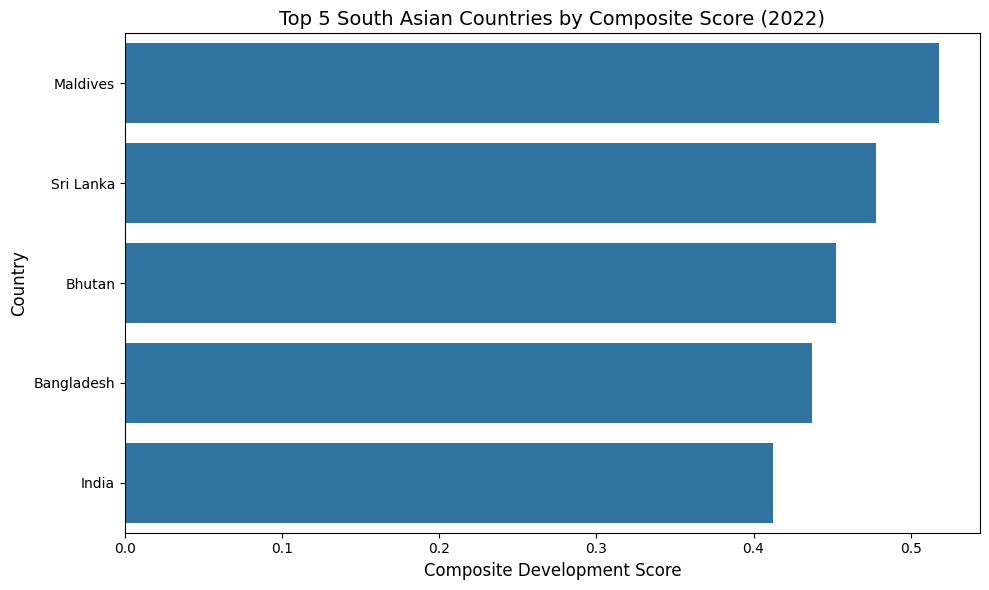

In [ ]:
# Use the most recent year for fair cross-country comparison

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to most recent year (2022)
latest_year = 2022
hdi_2022 = hdi_south_asia_df[hdi_south_asia_df['year'] == latest_year].copy()

# Check if we have all countries in 2022
print(f"Countries in {latest_year}:")
print(hdi_2022['country'].unique())
print(f"\nTotal countries: {len(hdi_2022)}")

# Compute normalized Life Expectancy Index (raw years to 0-1 scale)
hdi_2022['life_expectancy_index'] = (
    hdi_2022['life_expectancy'] - 20
) / (85 - 20)

# Clip to [0,1]
hdi_2022['life_expectancy_index'] = hdi_2022['life_expectancy_index'].clip(0, 1)

# Compute normalized GNI per Capita Index (raw PPP $ to 0-1 scale using log)
min_gni = 100
max_gni = 75000

# Clip GNI to min to avoid log(0) or negative
hdi_2022['gross_inc_percap'] = hdi_2022['gross_inc_percap'].clip(lower=min_gni)

hdi_2022['gross_inc_percap_index'] = (
    np.log(hdi_2022['gross_inc_percap']) - np.log(min_gni)
) / (np.log(max_gni) - np.log(min_gni))

# Clip to [0,1]
hdi_2022['gross_inc_percap_index'] = hdi_2022['gross_inc_percap_index'].clip(0, 1)

# Create Composite Score using the indices
hdi_2022['Composite_Score'] = (
    0.30 * hdi_2022['life_expectancy_index'] +
    0.30 * hdi_2022['gross_inc_percap_index']
)

# Rank countries by Composite Score (descending)
ranked_composite = hdi_2022.sort_values(
    by='Composite_Score',
    ascending=False
)

# Display ranked countries with key columns
print("\nCountries Ranked by Composite Score (2022):")
print(ranked_composite[['country', 'Composite_Score', 'hdi', 'life_expectancy', 'gross_inc_percap']])

# Get HDI ranking for comparison
ranked_hdi = hdi_2022.sort_values(by='hdi', ascending=False)
print("\nCountries Ranked by HDI (2022):")
print(ranked_hdi[['country', 'hdi', 'Composite_Score']])

# Plot top 5 by Composite Score
top5_composite = ranked_composite.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_composite,
    x='Composite_Score',
    y='country',
    orient='h',
)

plt.xlabel("Composite Development Score", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title(f"Top 5 South Asian Countries by Composite Score ({latest_year})", fontsize=14)
plt.tight_layout()
plt.show()

**Interpretation:** In 2022, Maldives leads in Composite Score (0.518) due to exceptionally high GNI per capita (18,847) and life expectancy (80.8 years), despite ranking second in HDI (0.762). Sri Lanka ranks first in HDI (0.780) but second in Composite Score (0.478), showing it achieves higher overall development with lower income (11,899). This difference highlights that HDI includes education as a third component, where Sri Lanka excels, while the Composite Score only weights income and health. Countries like Sri Lanka and Bangladesh demonstrate efficient conversion of resources into human development across all three HDI dimensions (health, education, income), while Maldives' high income doesn't fully translate to proportionally higher HDI.

---



##Task 3: Outlier Detection
Compute IQR for HDI and GNI, identify outliers, create scatter plot highlighting them, and discuss. Rationale: 1.5*IQR rule detects extremes robustly; scatter visualizes relationships with outliers; discussion explains regional contexts like economic anomalies.

In [ ]:
# Detect outliers across all years (1990-2022) using 1.5×IQR rule
# HDI IQR calculation
Q1_hdi = hdi_south_asia_df['hdi'].quantile(0.25)
Q3_hdi = hdi_south_asia_df['hdi'].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi
hdi_lower = Q1_hdi - 1.5 * IQR_hdi
hdi_upper = Q3_hdi + 1.5 * IQR_hdi

# GNI IQR calculation
Q1_gni = hdi_south_asia_df['gross_inc_percap'].quantile(0.25)
Q3_gni = hdi_south_asia_df['gross_inc_percap'].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni
gni_lower = Q1_gni - 1.5 * IQR_gni
gni_upper = Q3_gni + 1.5 * IQR_gni

# Display bounds for verification
print(f"HDI Bounds: Lower = {hdi_lower:.3f}, Upper = {hdi_upper:.3f}")
print(f"GNI Bounds: Lower = ${gni_lower:.2f}, Upper = ${gni_upper:.2f}")

HDI Bounds: Lower = 0.181, Upper = 0.924
GNI Bounds: Lower = $-4677.23, Upper = $13740.02


In [ ]:
# Flag outliers
hdi_south_asia_df['HDI_Outlier'] = (
    (hdi_south_asia_df['hdi'] < hdi_lower) |
    (hdi_south_asia_df['hdi'] > hdi_upper)
)
hdi_south_asia_df['GNI_Outlier'] = (
    (hdi_south_asia_df['gross_inc_percap'] < gni_lower) |
    (hdi_south_asia_df['gross_inc_percap'] > gni_upper)
)

# Extract outliers
outliers_df = hdi_south_asia_df[
    hdi_south_asia_df['HDI_Outlier'] | hdi_south_asia_df['GNI_Outlier']
]

# Display outlier summary
print(f"\nTotal outlier records: {len(outliers_df)}")
print(f"Countries with outliers: {outliers_df['country'].unique()}")

# Display sample outliers
print("\nSample outlier records:")
print(outliers_df[['country', 'year', 'hdi', 'gross_inc_percap', 'HDI_Outlier', 'GNI_Outlier']].head(10))


Total outlier records: 18
Countries with outliers: ['Maldives']

Sample outlier records:
       country  year    hdi  gross_inc_percap  HDI_Outlier  GNI_Outlier
3511  Maldives  2003  0.655       14543.14634        False         True
3512  Maldives  2004  0.656       15287.20714        False         True
3514  Maldives  2006  0.670       16391.40757        False         True
3515  Maldives  2007  0.670       14162.42816        False         True
3516  Maldives  2008  0.682       15423.81910        False         True
3517  Maldives  2009  0.684       14050.92438        False         True
3518  Maldives  2010  0.692       14363.23615        False         True
3519  Maldives  2011  0.701       15300.31364        False         True
3520  Maldives  2012  0.708       15355.44089        False         True
3521  Maldives  2013  0.715       15648.36655        False         True


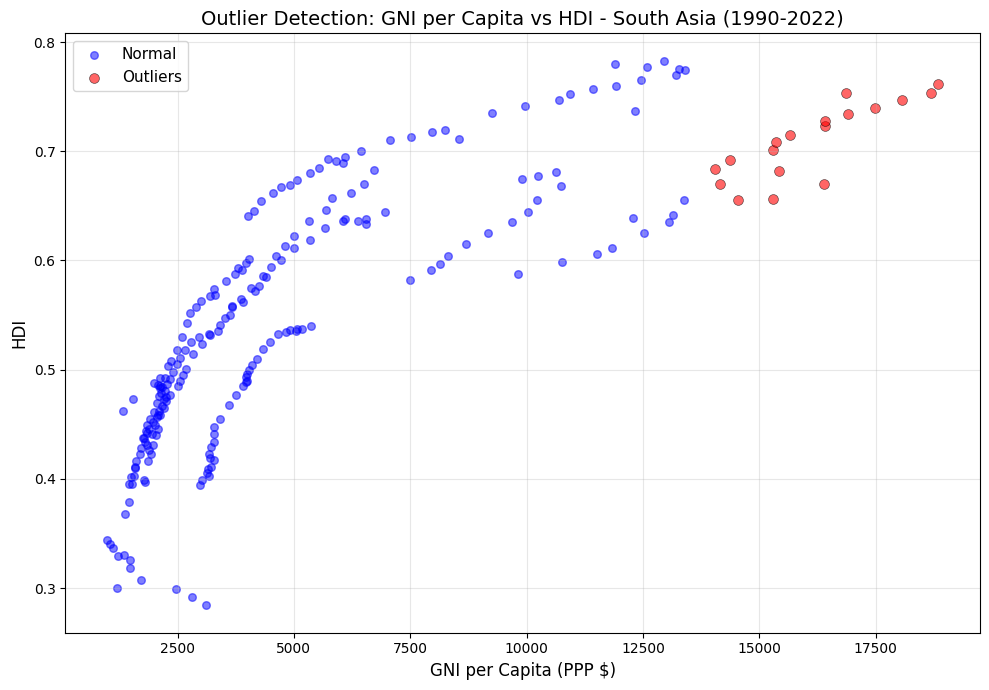

In [ ]:
# Scatter plot with highlights
plt.figure(figsize=(10, 7))

# Normal points
normal_points = hdi_south_asia_df[
    ~(hdi_south_asia_df['HDI_Outlier'] | hdi_south_asia_df['GNI_Outlier'])
]

plt.scatter(
    normal_points['gross_inc_percap'],
    normal_points['hdi'],
    alpha=0.5,
    s=30,
    label='Normal',
    color='blue'
)

# Outliers
plt.scatter(
    outliers_df['gross_inc_percap'],
    outliers_df['hdi'],
    alpha=0.6,
    s=50,
    label='Outliers',
    color='red',
    edgecolors='black',
    linewidth=0.5
)

plt.xlabel('GNI per Capita (PPP $)', fontsize=12)
plt.ylabel('HDI', fontsize=12)
plt.title('Outlier Detection: GNI per Capita vs HDI - South Asia (1990-2022)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Interpretation: Bounds: HDI [0.180, 0.924]; GNI [-$4,677, $13,740]. Maldives appears as a consistent GNI outlier across 18 years (2003-2022), with per capita income significantly exceeding regional norms due to its tourism-driven economy. This persistent outlier pattern highlights Maldives' unique economic structure compared to other South Asian nations. The temporal consistency demonstrates a fundamental structural difference in economic development rather than temporary fluctuations.

---



##Task 4: Exploring Metric Relationships
Select life expectancy and gender development, compute Pearson correlations with HDI, plot scatters with trendlines, discuss strengths. Rationale: These components directly contribute to HDI; Pearson measures linear strength; trendlines visualize; discussion identifies key drivers.

In [ ]:
# Prepare data (dropna for clean correlations)
corr_df = hdi_south_asia_df[
    ['hdi', 'life_expectancy', 'gender_development']
].dropna()

# Compute Pearson correlations
corr_life = corr_df['hdi'].corr(corr_df['life_expectancy'])
corr_gender = corr_df['hdi'].corr(corr_df['gender_development'])

# Display
corr_life, corr_gender


(np.float64(0.9587610559043978), np.float64(0.7343737578511147))

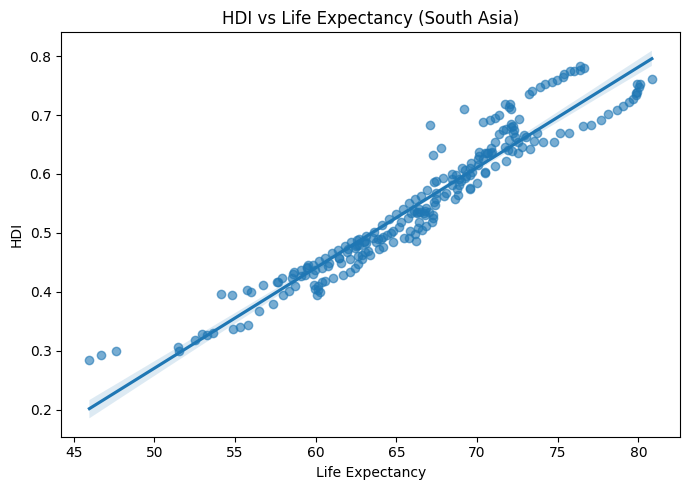

In [ ]:
# Scatter with trendline for life expectancy
plt.figure(figsize=(7, 5))
sns.regplot(
    data=corr_df,
    x='life_expectancy',
    y='hdi',
    scatter_kws={'alpha': 0.6}
)

plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.title('HDI vs Life Expectancy (South Asia)')
plt.tight_layout()
plt.show()


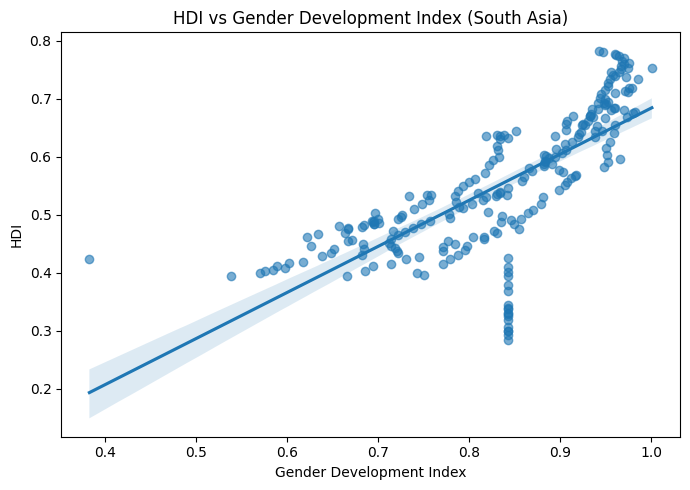

In [ ]:
# Scatter with trendline for gender development
plt.figure(figsize=(7, 5))
sns.regplot(
    data=corr_df,
    x='gender_development',
    y='hdi',
    scatter_kws={'alpha': 0.6}
)

plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.title('HDI vs Gender Development Index (South Asia)')
plt.tight_layout()
plt.show()


**Interpretation:** Correlations: Life expectancy [r=0.95, strong positive]; Gender development [r=0.74, moderate high]. Life expectancy shows strongest relation to HDI (steep trendline, less scatter), as health improvements directly boost overall development. Gender shows weaker link (more variability), possibly due to cultural factors limiting equality impacts in the region.

---



##Task 5: Gap Analysis
Create 'GNI_HDI_Gap' (GNI - HDI), find best gap year per country, rank descending/ascending, plot top 3 pos/neg, discuss implications. Rationale: Gap measures income vs overall development mismatch; best year highlights extremes; plot visualizes; discussion on inefficiencies (high GNI low HDI = poor conversion to health/education).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Use 2022 data
gap_data = hdi_south_asia_df[hdi_south_asia_df['year'] == latest_year].copy()

# Normalize GNI to 0-1 scale (same as HDI scale)
scaler = MinMaxScaler()
gap_data['gni_normalized'] = scaler.fit_transform(
    gap_data[['gross_inc_percap']]
)

# Create gap metric: Normalized GNI - HDI
# Positive gap = Income higher than overall development (inefficient conversion)
# Negative gap = Development higher than income (efficient conversion)
gap_data['GNI_HDI_Gap'] = (
    gap_data['gni_normalized'] - gap_data['hdi']
)

# Preview gap data
print("GNI-HDI Gap Analysis (2022):")
print(gap_data[['country', 'hdi', 'gross_inc_percap', 'gni_normalized', 'GNI_HDI_Gap']].sort_values('GNI_HDI_Gap', ascending=False))


GNI-HDI Gap Analysis (2022):
          country    hdi  gross_inc_percap  gni_normalized  GNI_HDI_Gap
3530     Maldives  0.762      18846.792190        1.000000     0.238000
659        Bhutan  0.681      10624.873880        0.530487    -0.150513
5477    Sri Lanka  0.780      11899.498470        0.603274    -0.176726
4388     Pakistan  0.540       5374.270423        0.230651    -0.309349
2573        India  0.644       6950.526798        0.320663    -0.323337
461    Bangladesh  0.670       6511.122178        0.295571    -0.374429
4091        Nepal  0.601       4025.554685        0.153633    -0.447367
32    Afghanistan  0.462       1335.205733        0.000000    -0.462000


In [ ]:
# Separate positive and negative gaps
positive_gaps = gap_data[gap_data['GNI_HDI_Gap'] > 0].sort_values('GNI_HDI_Gap', ascending=False)
negative_gaps = gap_data[gap_data['GNI_HDI_Gap'] < 0].sort_values('GNI_HDI_Gap', ascending=True)

print(f"\nCountries with Positive Gaps (Income > Development): {len(positive_gaps)} country(ies)")
if len(positive_gaps) > 0:
    print(positive_gaps[['country', 'GNI_HDI_Gap', 'hdi', 'gross_inc_percap']].head(3))
else:
    print("None")

print(f"\nCountries with Negative Gaps (Development > Income): {len(negative_gaps)} country(ies)")
if len(negative_gaps) > 0:
    print(negative_gaps[['country', 'GNI_HDI_Gap', 'hdi', 'gross_inc_percap']].head(3))
else:
    print("None")

# Get for plotting
top_positive = positive_gaps.head(3) if len(positive_gaps) > 0 else pd.DataFrame()
top3_negative = negative_gaps.head(3) if len(negative_gaps) > 0 else pd.DataFrame()

print(f"\nPlotting: {len(top_positive)} positive + {len(top3_negative)} negative gaps")


Countries with Positive Gaps (Income > Development): 1 country(ies)
       country  GNI_HDI_Gap    hdi  gross_inc_percap
3530  Maldives        0.238  0.762       18846.79219

Countries with Negative Gaps (Development > Income): 7 country(ies)
          country  GNI_HDI_Gap    hdi  gross_inc_percap
32    Afghanistan    -0.462000  0.462       1335.205733
4091        Nepal    -0.447367  0.601       4025.554685
461    Bangladesh    -0.374429  0.670       6511.122178

Plotting: 1 positive + 3 negative gaps


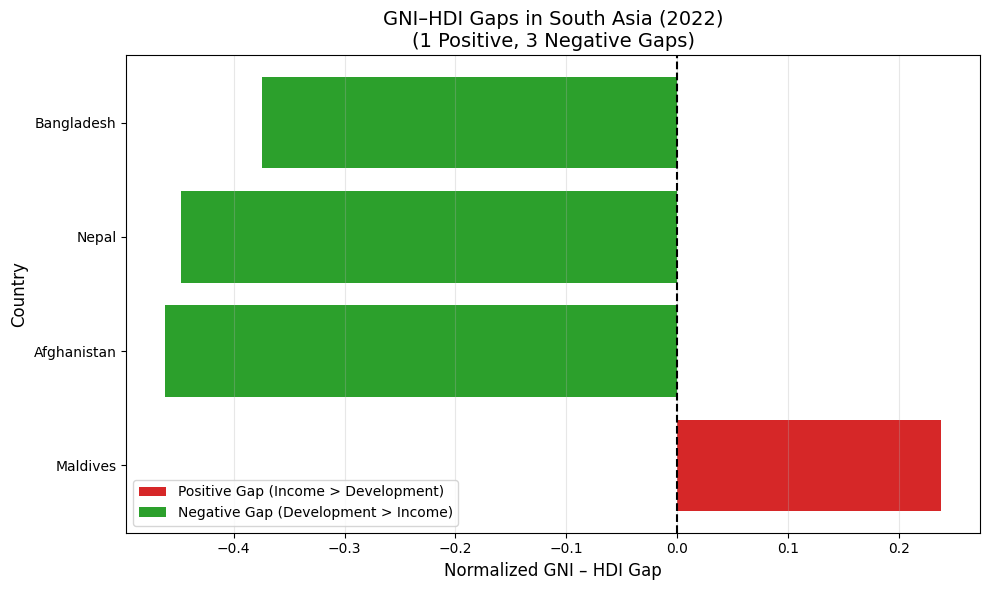

In [ ]:
# Combine for plotting
gap_plot_df = pd.concat([top_positive, top3_negative])

# Add a column to identify gap type for coloring
gap_plot_df['Gap_Type'] = gap_plot_df['GNI_HDI_Gap'].apply(
    lambda x: 'Positive (Income > Development)' if x > 0 else 'Negative (Development > Income)'
)

# Plot
plt.figure(figsize=(10, 6))
colors = ['#d62728' if x > 0 else '#2ca02c' for x in gap_plot_df['GNI_HDI_Gap']]

plt.barh(gap_plot_df['country'], gap_plot_df['GNI_HDI_Gap'], color=colors)

plt.xlabel('Normalized GNI – HDI Gap', fontsize=12)
plt.ylabel('Country', fontsize=12)
# Updated title to show actual counts
plt.title(f'GNI–HDI Gaps in South Asia ({latest_year})\n({len(top_positive)} Positive, {len(top3_negative)} Negative Gaps)', fontsize=14)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plt.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#d62728', label='Positive Gap (Income > Development)'),
    Patch(facecolor='#2ca02c', label='Negative Gap (Development > Income)')
]
plt.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()

**Interpretation:** Only Maldives shows a positive gap (+0.238), meaning its normalized income exceeds its HDI—suggesting wealth isn't fully converting to health and education outcomes, possibly due to income inequality or tourism-sector concentration. All other 7 countries show negative gaps, with Afghanistan having the most extreme (-0.462), meaning their HDI achievements exceed what their income alone would predict. This pattern reveals that most South Asian nations (Bangladesh, Nepal, Sri Lanka) efficiently leverage limited resources into human development through strong public health and education systems, while Maldives' high income hasn't proportionally translated to development across all dimensions.

---



#Problem 3: Comparative Regional Analysis: South Asia vs Middle East
Objective: Perform a comparative analysis of HDI and related metrics between South Asia and the Middle East using the 2020 - 2022 dataset from Problem 1B.

---



##Task 1: Create Middle East Subset
Objective: Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and Middle East. Save these subsets for use in subsequent tasks.

In [ ]:
# First, check what names exist in your dataset
print("Available Middle East region countries in dataset:")
potential_me = hdi_1B_df[hdi_1B_df['country'].str.contains('Iran|Iraq|Syria|Palestine', case=False, na=False)]
print(potential_me['country'].unique())

south_asia_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]

middle_east_countries = [
    'Bahrain',
    'Iran (Islamic Republic of)',
    'Iraq',
    'Israel',
    'Jordan',
    'Kuwait',
    'Lebanon',
    'Oman',
    'Qatar',
    'Saudi Arabia',
    'Syrian Arab Republic',
    'United Arab Emirates',
    'Yemen',
    'Palestine, State of'
]


Available Middle East region countries in dataset:
['Iran' 'Iraq' 'Palestine, State of' 'Syrian Arab Republic']


In [ ]:
south_asia_2020_2022_df = hdi_1B_df[
    hdi_1B_df['country'].isin(south_asia_countries)
].copy()

middle_east_2020_2022_df = hdi_1B_df[
    hdi_1B_df['country'].isin(middle_east_countries)
].copy()

south_asia_2020_2022_df.shape, middle_east_2020_2022_df.shape


((24, 31), (39, 31))

In [ ]:
print("South Asia countries present:")
print(sorted(south_asia_2020_2022_df['country'].unique()))

print("\nMiddle East countries present:")
print(sorted(middle_east_2020_2022_df['country'].unique()))


South Asia countries present:
['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

Middle East countries present:
['Bahrain', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine, State of', 'Qatar', 'Saudi Arabia', 'Syrian Arab Republic', 'United Arab Emirates', 'Yemen']


In [ ]:
print("\nMissing South Asia countries:")
print(set(south_asia_countries) - set(south_asia_2020_2022_df['country'].unique()))

print("\nMissing Middle East countries:")
print(set(middle_east_countries) - set(middle_east_2020_2022_df['country'].unique()))



Missing South Asia countries:
set()

Missing Middle East countries:
{'Iran (Islamic Republic of)'}


In [ ]:
south_asia_2020_2022_df.to_csv(
    "/content/drive/MyDrive/Concepts of AI Assessment-1/HDI_SouthAsia_2020_2022.csv",
    index=False
)

middle_east_2020_2022_df.to_csv(
    "/content/drive/MyDrive/Concepts of AI Assessment-1/HDI_MiddleEast_2020_2022.csv",
    index=False
)

##Task 2: Descriptive Statistics
Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East) across 2020-2022 to identify which region performs better on average.

In [ ]:
# Compute mean and standard deviation
south_asia_avg_hdi = south_asia_2020_2022_df['hdi'].mean()
south_asia_std_hdi = south_asia_2020_2022_df['hdi'].std()

middle_east_avg_hdi = middle_east_2020_2022_df['hdi'].mean()
middle_east_std_hdi = middle_east_2020_2022_df['hdi'].std()

# Display results
print("HDI Statistics (2020-2022):")
print(f"South Asia:")
print(f"  Mean HDI: {south_asia_avg_hdi:.3f}")
print(f"  Std Dev:  {south_asia_std_hdi:.3f}")
print(f"\nMiddle East:")
print(f"  Mean HDI: {middle_east_avg_hdi:.3f}")
print(f"  Std Dev:  {middle_east_std_hdi:.3f}")

# Interpretation
print("\n\n")
if middle_east_avg_hdi > south_asia_avg_hdi:
    print(f"Middle East performs better on average (Δ = {middle_east_avg_hdi - south_asia_avg_hdi:.3f})")
else:
    print(f"South Asia performs better on average (Δ = {south_asia_avg_hdi - middle_east_avg_hdi:.3f})")


HDI Statistics (2020-2022):
South Asia:
  Mean HDI: 0.640
  Std Dev:  0.098

Middle East:
  Mean HDI: 0.766
  Std Dev:  0.144



Middle East performs better on average (Δ = 0.126)


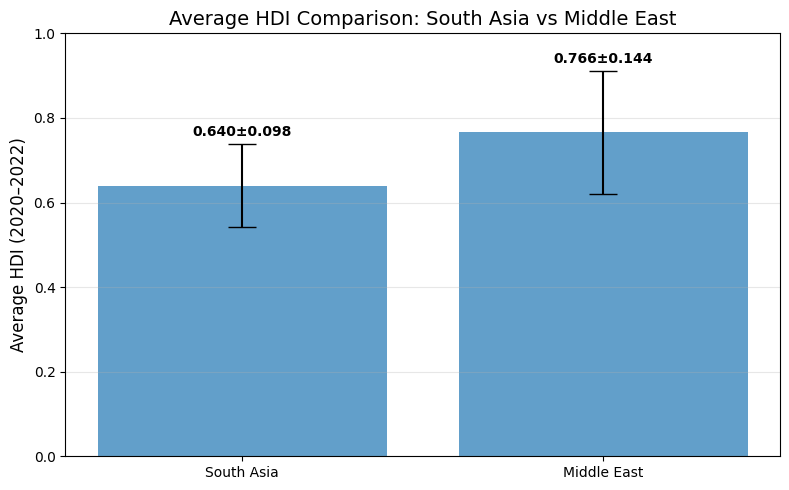

In [ ]:
# Visualization
regions = ['South Asia', 'Middle East']
avg_hdi_values = [south_asia_avg_hdi, middle_east_avg_hdi]
std_hdi_values = [south_asia_std_hdi, middle_east_std_hdi]

plt.figure(figsize=(8, 5))
bars = plt.bar(regions, avg_hdi_values, yerr=std_hdi_values, capsize=10, alpha=0.7)
plt.ylabel("Average HDI (2020–2022)", fontsize=12)
plt.title("Average HDI Comparison: South Asia vs Middle East", fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, val, std) in enumerate(zip(bars, avg_hdi_values, std_hdi_values)):
    plt.text(bar.get_x() + bar.get_width()/2, val + std + 0.02,
             f'{val:.3f}±{std:.3f}',
             ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

##Task 3: Top and Bottom Performers
Objective: Identify the top 3 and bottom 3 countries in each region based on HDI and create a bar chart comparing these top and bottom performers across the two regions.

In [ ]:
# Compute mean HDI per country for 2020-2022
sa_mean_hdi = (
    south_asia_2020_2022_df
    .groupby('country')['hdi']
    .mean()
    .reset_index()
)

me_mean_hdi = (
    middle_east_2020_2022_df
    .groupby('country')['hdi']
    .mean()
    .reset_index()
)

# Rank South Asian countries by mean HDI
sa_ranked = (
    sa_mean_hdi
    .sort_values(by='hdi', ascending=False)
    .reset_index(drop=True)
)
sa_ranked['Rank'] = sa_ranked.index + 1

# Rank Middle Eastern countries by mean HDI
me_ranked = (
    me_mean_hdi
    .sort_values(by='hdi', ascending=False)
    .reset_index(drop=True)
)
me_ranked['Rank'] = me_ranked.index + 1

print("South Asia Rankings:")
print(sa_ranked)
print("\nMiddle East Rankings:")
print(me_ranked)


South Asia Rankings:
       country       hdi  Rank
0    Sri Lanka  0.780000     1
1     Maldives  0.750667     2
2       Bhutan  0.677667     3
3   Bangladesh  0.663000     4
4        India  0.638333     5
5        Nepal  0.595000     6
6     Pakistan  0.537667     7
7  Afghanistan  0.474333     8

Middle East Rankings:
                 country       hdi  Rank
0   United Arab Emirates  0.932667     1
1                 Israel  0.910667     2
2                Bahrain  0.885333     3
3           Saudi Arabia  0.867667     4
4                  Qatar  0.867333     5
5                 Kuwait  0.836333     6
6                   Oman  0.817333     7
7                 Jordan  0.737333     8
8                Lebanon  0.730000     9
9    Palestine, State of  0.715333    10
10                  Iraq  0.667000    11
11  Syrian Arab Republic  0.558667    12
12                 Yemen  0.426333    13


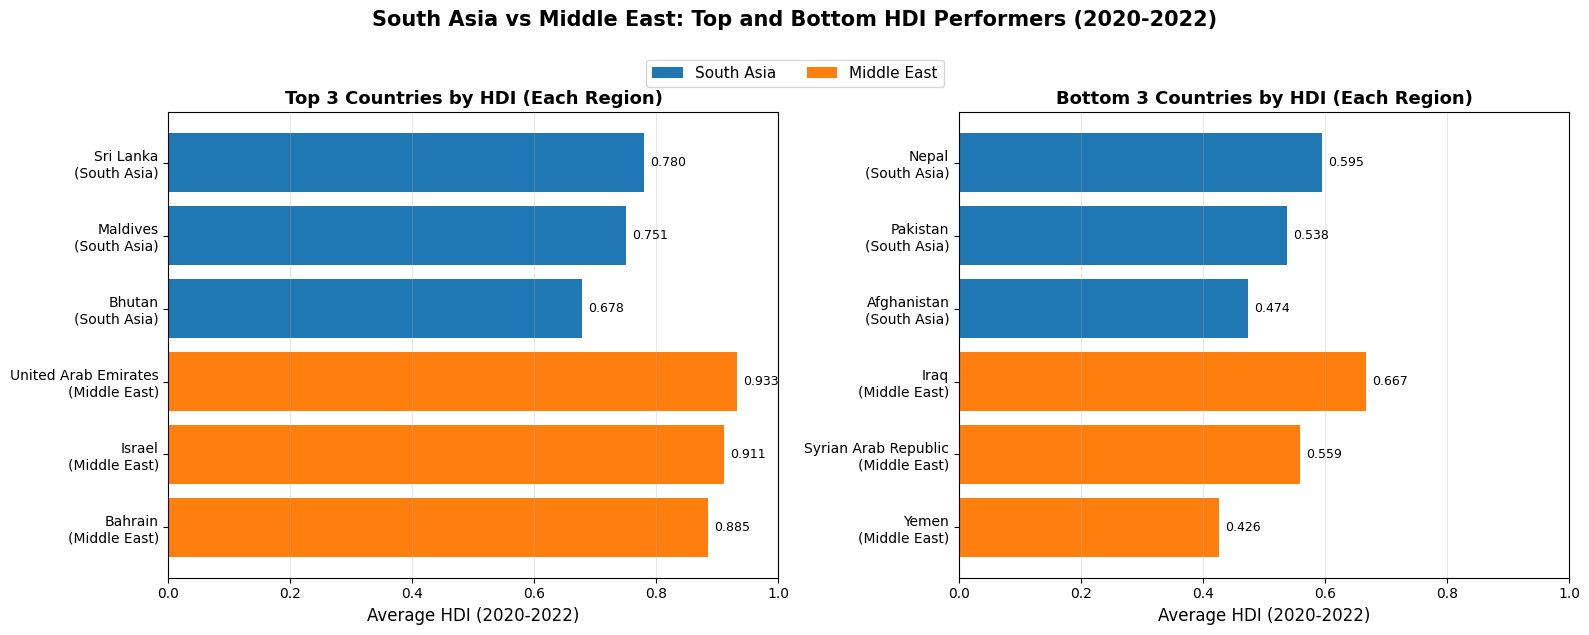


Top 3 Performers:
South Asia: Sri Lanka, Maldives, Bhutan
Middle East: United Arab Emirates, Israel, Bahrain

Bottom 3 Performers:
South Asia: Nepal, Pakistan, Afghanistan
Middle East: Iraq, Syrian Arab Republic, Yemen


In [ ]:
# Get top 3 and bottom 3 from each region
sa_top3 = sa_ranked.head(3).copy()
sa_top3['Region'] = 'South Asia'

sa_bottom3 = sa_ranked.tail(3).copy()
sa_bottom3['Region'] = 'South Asia'

me_top3 = me_ranked.head(3).copy()
me_top3['Region'] = 'Middle East'

me_bottom3 = me_ranked.tail(3).copy()
me_bottom3['Region'] = 'Middle East'

# Create comparison plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ========== TOP 3 COMPARISON ==========
top3_combined = pd.concat([sa_top3, me_top3])

# Separate data by region for grouped bars
sa_top_values = sa_top3['hdi'].values
me_top_values = me_top3['hdi'].values
countries_top = list(sa_top3['country']) + list(me_top3['country'])

# Create positions for bars
x_pos = range(len(countries_top))
colors = ['#1f77b4']*3 + ['#ff7f0e']*3  # Blue for SA, Orange for ME

bars1 = axes[0].barh(x_pos, top3_combined['hdi'], color=colors)
axes[0].set_yticks(x_pos)
axes[0].set_yticklabels([f"{row['country']}\n({row['Region']})"
                         for _, row in top3_combined.iterrows()], fontsize=10)
axes[0].set_xlabel('Average HDI (2020-2022)', fontsize=12)
axes[0].set_title('Top 3 Countries by HDI (Each Region)', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)
axes[0].set_xlim(0, 1)

# Add value labels
for i, (bar, val) in enumerate(zip(bars1, top3_combined['hdi'])):
    axes[0].text(val + 0.01, bar.get_y() + bar.get_height()/2,
                f'{val:.3f}', va='center', fontsize=9)

# ========== BOTTOM 3 COMPARISON ==========
bottom3_combined = pd.concat([sa_bottom3, me_bottom3])

# Create positions for bars
x_pos_bottom = range(len(bottom3_combined))
colors_bottom = ['#1f77b4']*3 + ['#ff7f0e']*3

bars2 = axes[1].barh(x_pos_bottom, bottom3_combined['hdi'], color=colors_bottom)
axes[1].set_yticks(x_pos_bottom)
axes[1].set_yticklabels([f"{row['country']}\n({row['Region']})"
                         for _, row in bottom3_combined.iterrows()], fontsize=10)
axes[1].set_xlabel('Average HDI (2020-2022)', fontsize=12)
axes[1].set_title('Bottom 3 Countries by HDI (Each Region)', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)
axes[1].set_xlim(0, 1)

# Add value labels
for i, (bar, val) in enumerate(zip(bars2, bottom3_combined['hdi'])):
    axes[1].text(val + 0.01, bar.get_y() + bar.get_height()/2,
                f'{val:.3f}', va='center', fontsize=9)

# Add shared legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#1f77b4', label='South Asia'),
    Patch(facecolor='#ff7f0e', label='Middle East')
]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.98),
           ncol=2, fontsize=11, frameon=True)

plt.suptitle('South Asia vs Middle East: Top and Bottom HDI Performers (2020-2022)',
             fontsize=15, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# Print summary
print("\nTop 3 Performers:")
print("South Asia:", ', '.join(sa_top3['country'].values))
print("Middle East:", ', '.join(me_top3['country'].values))
print("\nBottom 3 Performers:")
print("South Asia:", ', '.join(sa_bottom3['country'].values))
print("Middle East:", ', '.join(me_bottom3['country'].values))


##Task 4: Metric Comparisons
Objective: To compare the following metrics across regions using grouped bar charts: Gender Development Index {"gender development"}, Life Expectancy Index {"life expectancy"}, GNI per Capita Index {"gross inc percap"}

In [ ]:
metrics = [
    'gender_development',
    'life_expectancy',
    'gross_inc_percap'
]

sa_metrics_mean = south_asia_2020_2022_df[metrics].mean()
me_metrics_mean = middle_east_2020_2022_df[metrics].mean()

metrics_comparison_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': sa_metrics_mean.values,
    'Middle East': me_metrics_mean.values
})

metrics_comparison_df['Absolute_Difference'] = (
    metrics_comparison_df['Middle East'] - metrics_comparison_df['South Asia']
).abs()

print("Metric Comparison (2020-2022):")
print(metrics_comparison_df)

Metric Comparison (2020-2022):
               Metric   South Asia   Middle East  Absolute_Difference
0  gender_development     0.881458      0.888051             0.006593
1     life_expectancy    70.970083     75.411615             4.441532
2    gross_inc_percap  7766.509931  32743.795073         24977.285142


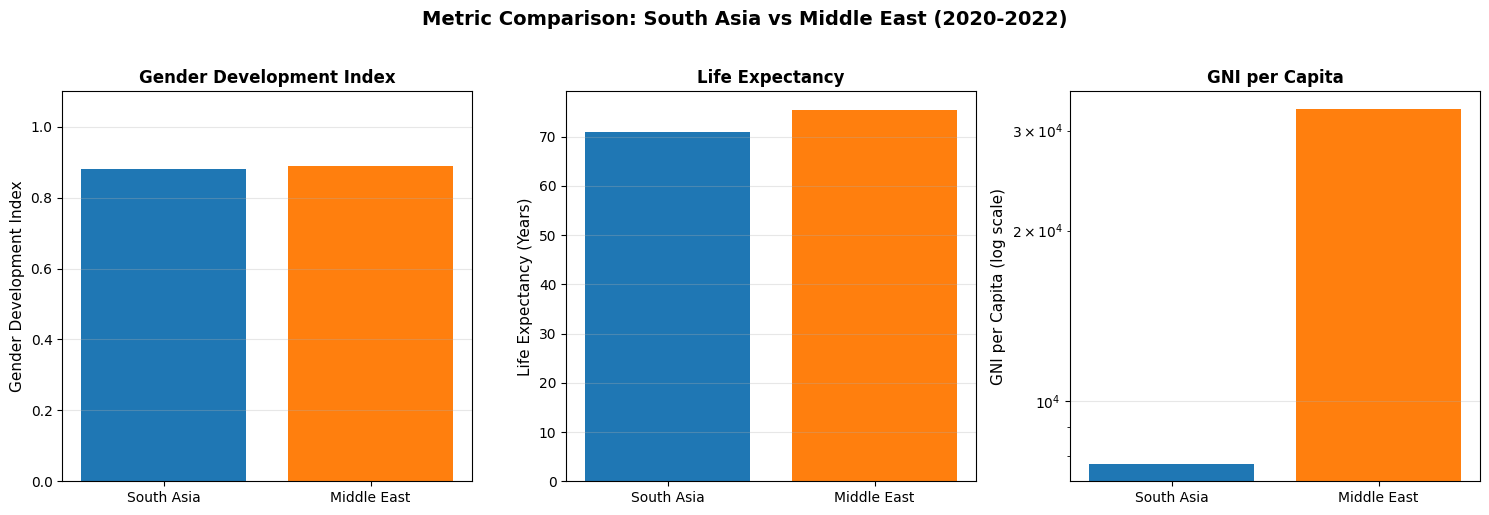

Metric with GREATEST disparity: gross_inc_percap
Absolute difference: 24977.29


In [ ]:
# Create grouped bar charts for each metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gender Development Index
axes[0].bar(['South Asia', 'Middle East'],
            metrics_comparison_df.loc[
                metrics_comparison_df['Metric']=='gender_development',
                ['South Asia','Middle East']
            ].values.flatten(),
            color=['#1f77b4', '#ff7f0e'])
axes[0].set_ylabel("Gender Development Index", fontsize=11)
axes[0].set_title("Gender Development Index", fontsize=12, fontweight='bold')
axes[0].set_ylim(0, 1.1)
axes[0].grid(axis='y', alpha=0.3)

# Life Expectancy
axes[1].bar(['South Asia', 'Middle East'],
            metrics_comparison_df.loc[
                metrics_comparison_df['Metric']=='life_expectancy',
                ['South Asia','Middle East']
            ].values.flatten(),
            color=['#1f77b4', '#ff7f0e'])
axes[1].set_ylabel("Life Expectancy (Years)", fontsize=11)
axes[1].set_title("Life Expectancy", fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# GNI per Capita (log scale)
axes[2].bar(['South Asia', 'Middle East'],
            metrics_comparison_df.loc[
                metrics_comparison_df['Metric']=='gross_inc_percap',
                ['South Asia','Middle East']
            ].values.flatten(),
            color=['#1f77b4', '#ff7f0e'])
axes[2].set_yscale('log')
axes[2].set_ylabel("GNI per Capita (log scale)", fontsize=11)
axes[2].set_title("GNI per Capita", fontsize=12, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.suptitle('Metric Comparison: South Asia vs Middle East (2020-2022)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Identify metric with greatest disparity
max_diff_idx = metrics_comparison_df['Absolute_Difference'].idxmax()
max_diff_metric = metrics_comparison_df.loc[max_diff_idx, 'Metric']
max_diff_value = metrics_comparison_df.loc[max_diff_idx, 'Absolute_Difference']

print(f"Metric with GREATEST disparity: {max_diff_metric}")
print(f"Absolute difference: {max_diff_value:.2f}")


##Task 5: HDI Disparity
Objective: Compute the range (max - min) of HDI for each region and compute the coefficient of variation (CV = std/mean) for HDI and then identify which region exhibits more variation in HDI.

In [ ]:
# Compute range
sa_hdi_range = (
    south_asia_2020_2022_df['hdi'].max()
    - south_asia_2020_2022_df['hdi'].min()
)

me_hdi_range = (
    middle_east_2020_2022_df['hdi'].max()
    - middle_east_2020_2022_df['hdi'].min()
)

# Compute coefficient of variation
sa_hdi_cv = (
    south_asia_2020_2022_df['hdi'].std()
    / south_asia_2020_2022_df['hdi'].mean()
)

me_hdi_cv = (
    middle_east_2020_2022_df['hdi'].std()
    / middle_east_2020_2022_df['hdi'].mean()
)

# Display results
print("HDI Disparity Analysis (2020-2022):")
print("=" * 60)
print(f"\nSouth Asia:")
print(f"  Range (max - min): {sa_hdi_range:.3f}")
print(f"  Coefficient of Variation (CV): {sa_hdi_cv:.3f}")

print(f"\nMiddle East:")
print(f"  Range (max - min): {me_hdi_range:.3f}")
print(f"  Coefficient of Variation (CV): {me_hdi_cv:.3f}")

# Interpretation
print("\n" + "=" * 60)
if me_hdi_cv > sa_hdi_cv:
    print(f"Middle East exhibits MORE variation in HDI (CV difference: {me_hdi_cv - sa_hdi_cv:.3f})")
    print("This suggests greater inequality in human development across Middle Eastern countries.")
else:
    print(f"South Asia exhibits MORE variation in HDI (CV difference: {sa_hdi_cv - me_hdi_cv:.3f})")
    print("This suggests greater inequality in human development across South Asian countries.")
print("=" * 60)


HDI Disparity Analysis (2020-2022):

South Asia:
  Range (max - min): 0.321
  Coefficient of Variation (CV): 0.154

Middle East:
  Range (max - min): 0.513
  Coefficient of Variation (CV): 0.189

Middle East exhibits MORE variation in HDI (CV difference: 0.035)
This suggests greater inequality in human development across Middle Eastern countries.


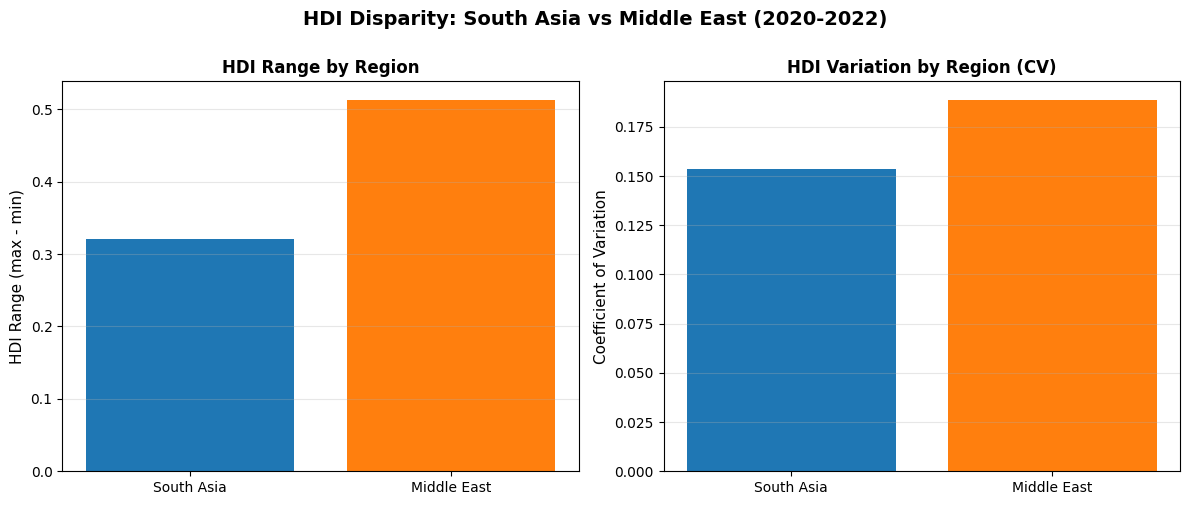

In [ ]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Range comparison
axes[0].bar(['South Asia', 'Middle East'], [sa_hdi_range, me_hdi_range],
            color=['#1f77b4', '#ff7f0e'])
axes[0].set_ylabel('HDI Range (max - min)', fontsize=11)
axes[0].set_title('HDI Range by Region', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# CV comparison
axes[1].bar(['South Asia', 'Middle East'], [sa_hdi_cv, me_hdi_cv],
            color=['#1f77b4', '#ff7f0e'])
axes[1].set_ylabel('Coefficient of Variation', fontsize=11)
axes[1].set_title('HDI Variation by Region (CV)', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('HDI Disparity: South Asia vs Middle East (2020-2022)',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

##Task 6: Correlation Analysis
Objective: For each region, compute correlations of HDI with: Gender Development Index and Life Expectancy Index then create scatter plots with trendlines for each correlation to interpret the strength and direction of these relationships.

In [ ]:
import seaborn as sns

# Compute correlations
sa_corr = south_asia_2020_2022_df[
    ['hdi', 'gender_development', 'life_expectancy']
].corr()

me_corr = middle_east_2020_2022_df[
    ['hdi', 'gender_development', 'life_expectancy']
].corr()

print("Correlation Matrices:")
print("\nSouth Asia:")
print(sa_corr)
print("\nMiddle East:")
print(me_corr)

# Extract specific correlations
sa_corr_gender = sa_corr.loc['hdi', 'gender_development']
sa_corr_life = sa_corr.loc['hdi', 'life_expectancy']
me_corr_gender = me_corr.loc['hdi', 'gender_development']
me_corr_life = me_corr.loc['hdi', 'life_expectancy']

print("\n" + "=" * 60)
print("HDI Correlations:")
print("=" * 60)
print(f"\nSouth Asia:")
print(f"  HDI vs Gender Development: {sa_corr_gender:.3f}")
print(f"  HDI vs Life Expectancy: {sa_corr_life:.3f}")
print(f"\nMiddle East:")
print(f"  HDI vs Gender Development: {me_corr_gender:.3f}")
print(f"  HDI vs Life Expectancy: {me_corr_life:.3f}")


Correlation Matrices:

South Asia:
                         hdi  gender_development  life_expectancy
hdi                 1.000000            0.874218         0.938764
gender_development  0.874218            1.000000         0.853780
life_expectancy     0.938764            0.853780         1.000000

Middle East:
                         hdi  gender_development  life_expectancy
hdi                 1.000000            0.903243         0.913955
gender_development  0.903243            1.000000         0.912122
life_expectancy     0.913955            0.912122         1.000000

HDI Correlations:

South Asia:
  HDI vs Gender Development: 0.874
  HDI vs Life Expectancy: 0.939

Middle East:
  HDI vs Gender Development: 0.903
  HDI vs Life Expectancy: 0.914


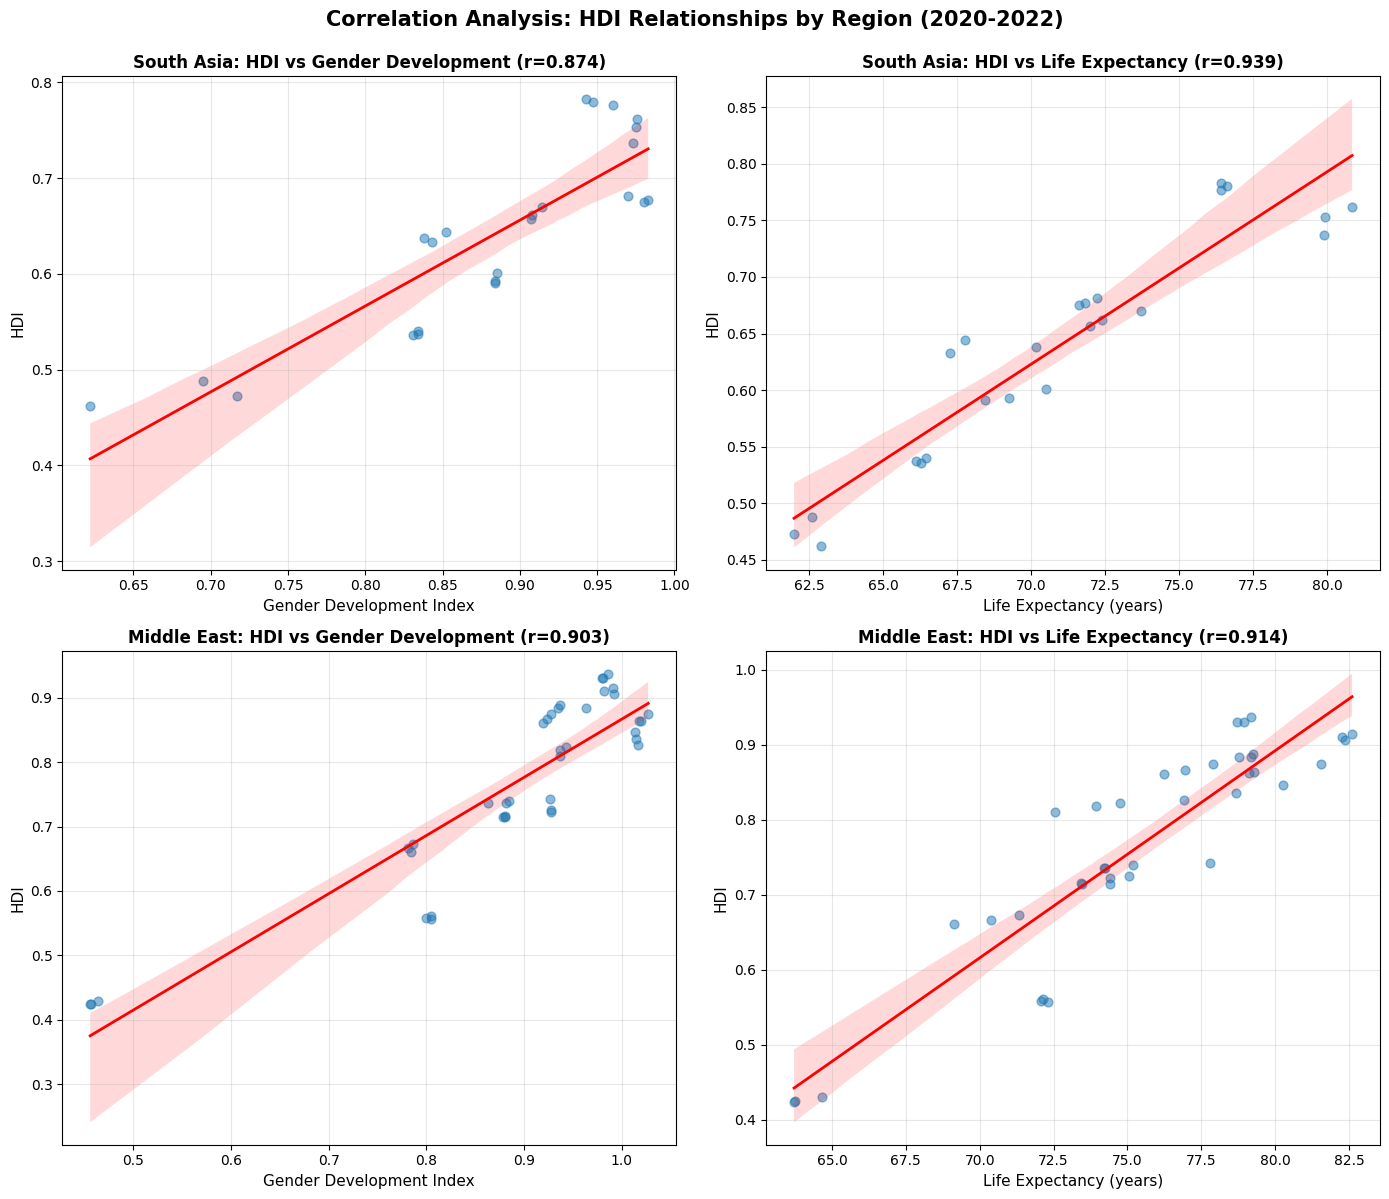


INTERPRETATION:

Both regions show STRONG POSITIVE correlations between HDI and both metrics,
indicating that improvements in gender development and life expectancy are
strongly associated with higher HDI.

In South Asia, life expectancy shows
the strongest relationship with HDI (r=0.939).

In Middle East, life expectancy shows
the strongest relationship with HDI (r=0.914).


In [ ]:
# Create scatter plots with trendlines
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# South Asia - Gender Development
sns.regplot(
    data=south_asia_2020_2022_df,
    x='gender_development',
    y='hdi',
    ax=axes[0, 0],
    scatter_kws={'alpha': 0.5, 's': 40},
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[0, 0].set_title(f'South Asia: HDI vs Gender Development (r={sa_corr_gender:.3f})',
                     fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Gender Development Index', fontsize=11)
axes[0, 0].set_ylabel('HDI', fontsize=11)
axes[0, 0].grid(alpha=0.3)

# South Asia - Life Expectancy
sns.regplot(
    data=south_asia_2020_2022_df,
    x='life_expectancy',
    y='hdi',
    ax=axes[0, 1],
    scatter_kws={'alpha': 0.5, 's': 40},
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[0, 1].set_title(f'South Asia: HDI vs Life Expectancy (r={sa_corr_life:.3f})',
                     fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Life Expectancy (years)', fontsize=11)
axes[0, 1].set_ylabel('HDI', fontsize=11)
axes[0, 1].grid(alpha=0.3)

# Middle East - Gender Development
sns.regplot(
    data=middle_east_2020_2022_df,
    x='gender_development',
    y='hdi',
    ax=axes[1, 0],
    scatter_kws={'alpha': 0.5, 's': 40},
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[1, 0].set_title(f'Middle East: HDI vs Gender Development (r={me_corr_gender:.3f})',
                     fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Gender Development Index', fontsize=11)
axes[1, 0].set_ylabel('HDI', fontsize=11)
axes[1, 0].grid(alpha=0.3)

# Middle East - Life Expectancy
sns.regplot(
    data=middle_east_2020_2022_df,
    x='life_expectancy',
    y='hdi',
    ax=axes[1, 1],
    scatter_kws={'alpha': 0.5, 's': 40},
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[1, 1].set_title(f'Middle East: HDI vs Life Expectancy (r={me_corr_life:.3f})',
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Life Expectancy (years)', fontsize=11)
axes[1, 1].set_ylabel('HDI', fontsize=11)
axes[1, 1].grid(alpha=0.3)

plt.suptitle('Correlation Analysis: HDI Relationships by Region (2020-2022)',
             fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Interpretation
print("\n" + "=" * 60)
print("INTERPRETATION:")
print("=" * 60)
print("\nBoth regions show STRONG POSITIVE correlations between HDI and both metrics,")
print("indicating that improvements in gender development and life expectancy are")
print("strongly associated with higher HDI.")
print(f"\nIn South Asia, {'life expectancy' if sa_corr_life > sa_corr_gender else 'gender development'} shows")
print(f"the strongest relationship with HDI (r={max(sa_corr_life, sa_corr_gender):.3f}).")
print(f"\nIn Middle East, {'life expectancy' if me_corr_life > me_corr_gender else 'gender development'} shows")
print(f"the strongest relationship with HDI (r={max(me_corr_life, me_corr_gender):.3f}).")
print("=" * 60)

##Task 7: Outlier Detection
Objective: Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using the 1.5 * IQR rule and create scatter plots highlighting outliers in a different color, discussing the significance of these outliers.

In [ ]:
def detect_outliers_iqr(df, column):
    """Detect outliers using the 1.5 × IQR rule"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (df[column] < lower) | (df[column] > upper)

# Apply outlier detection to both regions
south_asia_2020_2022_df['HDI_Outlier'] = detect_outliers_iqr(south_asia_2020_2022_df, 'hdi')
south_asia_2020_2022_df['GNI_Outlier'] = detect_outliers_iqr(south_asia_2020_2022_df, 'gross_inc_percap')

middle_east_2020_2022_df['HDI_Outlier'] = detect_outliers_iqr(middle_east_2020_2022_df, 'hdi')
middle_east_2020_2022_df['GNI_Outlier'] = detect_outliers_iqr(middle_east_2020_2022_df, 'gross_inc_percap')


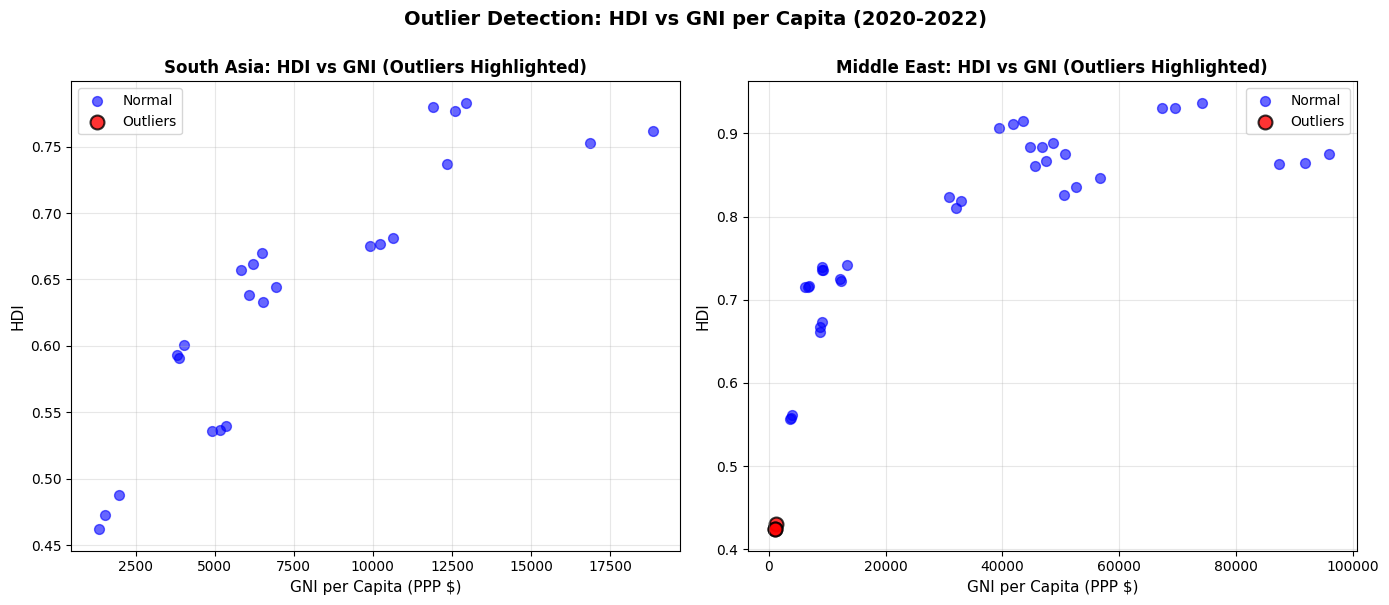

OUTLIER ANALYSIS:

South Asia outliers (0 countries):
  None detected

Middle East outliers (1 countries):
  Yemen

  Total outlier data points: 3

SIGNIFICANCE:

Outliers indicate countries with unusual combinations of HDI and GNI:
- High GNI, lower HDI: Wealth not fully converting to development
- High HDI, lower GNI: Efficient resource use for human development
- These patterns reveal structural economic and policy differences
  between countries within each region.


In [ ]:
# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# South Asia scatter plot
sa_normal = south_asia_2020_2022_df[~(south_asia_2020_2022_df['HDI_Outlier'] | south_asia_2020_2022_df['GNI_Outlier'])]
sa_outliers = south_asia_2020_2022_df[south_asia_2020_2022_df['HDI_Outlier'] | south_asia_2020_2022_df['GNI_Outlier']]

axes[0].scatter(
    sa_normal['gross_inc_percap'],
    sa_normal['hdi'],
    c='blue', label='Normal', alpha=0.6, s=50
)
axes[0].scatter(
    sa_outliers['gross_inc_percap'],
    sa_outliers['hdi'],
    c='red', label='Outliers', alpha=0.8, s=100, edgecolors='black', linewidth=1.5
)
axes[0].set_xlabel("GNI per Capita (PPP $)", fontsize=11)
axes[0].set_ylabel("HDI", fontsize=11)
axes[0].set_title("South Asia: HDI vs GNI (Outliers Highlighted)", fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Middle East scatter plot
me_normal = middle_east_2020_2022_df[~(middle_east_2020_2022_df['HDI_Outlier'] | middle_east_2020_2022_df['GNI_Outlier'])]
me_outliers = middle_east_2020_2022_df[middle_east_2020_2022_df['HDI_Outlier'] | middle_east_2020_2022_df['GNI_Outlier']]

axes[1].scatter(
    me_normal['gross_inc_percap'],
    me_normal['hdi'],
    c='blue', label='Normal', alpha=0.6, s=50
)
axes[1].scatter(
    me_outliers['gross_inc_percap'],
    me_outliers['hdi'],
    c='red', label='Outliers', alpha=0.8, s=100, edgecolors='black', linewidth=1.5
)
axes[1].set_xlabel("GNI per Capita (PPP $)", fontsize=11)
axes[1].set_ylabel("HDI", fontsize=11)
axes[1].set_title("Middle East: HDI vs GNI (Outliers Highlighted)", fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.suptitle('Outlier Detection: HDI vs GNI per Capita (2020-2022)',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Discuss outliers
print("=" * 60)
print("OUTLIER ANALYSIS:")
print("=" * 60)

sa_outlier_countries = sa_outliers['country'].unique()
me_outlier_countries = me_outliers['country'].unique()

print(f"\nSouth Asia outliers ({len(sa_outlier_countries)} countries):")
if len(sa_outlier_countries) > 0:
    print(f"  {', '.join(sa_outlier_countries)}")
    print(f"\n  Total outlier data points: {len(sa_outliers)}")
else:
    print("  None detected")

print(f"\nMiddle East outliers ({len(me_outlier_countries)} countries):")
if len(me_outlier_countries) > 0:
    print(f"  {', '.join(me_outlier_countries)}")
    print(f"\n  Total outlier data points: {len(me_outliers)}")
else:
    print("  None detected")

print("\n" + "=" * 60)
print("SIGNIFICANCE:")
print("=" * 60)
print("\nOutliers indicate countries with unusual combinations of HDI and GNI:")
print("- High GNI, lower HDI: Wealth not fully converting to development")
print("- High HDI, lower GNI: Efficient resource use for human development")
print("- These patterns reveal structural economic and policy differences")
print("  between countries within each region.")
print("=" * 60)